In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import mirz_wrangle as w

# Q2

In [2]:
df = w.wrangle_zillow()

In [3]:
train, validate, test = w.split_data(df)

In [4]:
#baseline maybe
train['yhat_tax_val_baseline'] = train['tax_value'].mean()

In [5]:
#sample of train for visuals
train_viz = train.sample(frac=.001, replace=True, random_state=777)

In [6]:
#target variable
y = train_viz[['tax_value']]

In [7]:
#we can adjust this
x = train_viz[['sq_feet']]

In [8]:
#ordinary least square model
ols_model = LinearRegression().fit(x,y)

In [9]:
#predictions to compare to baseline
train_viz['yhat_tax_val_sq_ft'] = ols_model.predict(x)

In [10]:
train_viz.head()

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips,yhat_tax_val_baseline,yhat_tax_val_sq_ft
1634157,3,0.0,3707,556194,1973,5926.30,6111,398512.769647,865425.440702
1932600,4,2.0,1820,523630,1955,6124.80,6037,398512.769647,410748.814276
1362910,5,3.0,3816,687233,1972,8567.92,6037,398512.769647,891689.220395
1761877,4,2.0,1600,190359,1992,3196.29,6037,398512.769647,357739.350676
1140986,3,4.0,3287,1280000,1997,13428.88,6059,398512.769647,764225.555647


# Q3

In [11]:
#train_viz['residual_tax_val'] = train_viz['yhat_tax_val_sq_ft'] - train_viz['tax_value']
#train_viz['residual_baseline'] = train_viz['yhat_tax_val_baseline'] - train_viz['tax_value']

In [12]:
train_viz['residual_tax_val'] = train_viz['tax_value'] - train_viz['yhat_tax_val_sq_ft']
train_viz['residual_baseline'] = train_viz['tax_value'] - train_viz['yhat_tax_val_baseline']

In [13]:
train_viz.head()

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips,yhat_tax_val_baseline,yhat_tax_val_sq_ft,residual_tax_val,residual_baseline
1634157,3,0.0,3707,556194,1973,5926.30,6111,398512.769647,865425.440702,-309231.440702,157681.230353
1932600,4,2.0,1820,523630,1955,6124.80,6037,398512.769647,410748.814276,112881.185724,125117.230353
1362910,5,3.0,3816,687233,1972,8567.92,6037,398512.769647,891689.220395,-204456.220395,288720.230353
1761877,4,2.0,1600,190359,1992,3196.29,6037,398512.769647,357739.350676,-167380.350676,-208153.769647
1140986,3,4.0,3287,1280000,1997,13428.88,6059,398512.769647,764225.555647,515774.444353,881487.230353


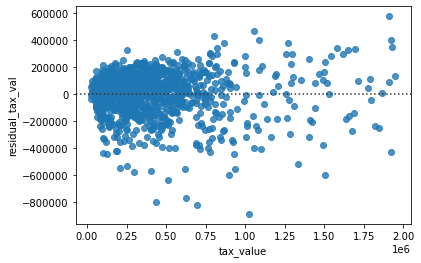

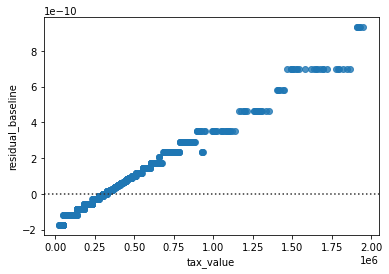

In [14]:
sns.residplot(x=train_viz.tax_value, y=train_viz.residual_tax_val, data=train_viz, line_kws={'color':'red'})
plt.show()
sns.residplot(x=train_viz.tax_value, y=train_viz.residual_baseline, data=train_viz, line_kws={'color':'red'})
plt.show()

# Q4

In [15]:
train_viz['residual^2']= train_viz.residual_tax_val ** 2

train_viz['residual_baseline^2']=train_viz.residual_baseline ** 2

In [16]:
train_viz.head()

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips,yhat_tax_val_baseline,yhat_tax_val_sq_ft,residual_tax_val,residual_baseline,residual^2,residual_baseline^2
1634157,3,0.0,3707,556194,1973,5926.30,6111,398512.769647,865425.440702,-309231.440702,157681.230353,9.562408e+10,2.486337e+10
1932600,4,2.0,1820,523630,1955,6124.80,6037,398512.769647,410748.814276,112881.185724,125117.230353,1.274216e+10,1.565432e+10
1362910,5,3.0,3816,687233,1972,8567.92,6037,398512.769647,891689.220395,-204456.220395,288720.230353,4.180235e+10,8.335937e+10
1761877,4,2.0,1600,190359,1992,3196.29,6037,398512.769647,357739.350676,-167380.350676,-208153.769647,2.801618e+10,4.332799e+10
1140986,3,4.0,3287,1280000,1997,13428.88,6059,398512.769647,764225.555647,515774.444353,881487.230353,2.660233e+11,7.770197e+11


In [17]:
sse = sum(train_viz['residual^2'])
sse_baseline = sum(train_viz['residual_baseline^2'])

In [18]:
sse2=mean_squared_error(train_viz.tax_value, train_viz.yhat_tax_val_sq_ft)*len(train_viz)

In [19]:
sse2_baseline=mean_squared_error(train_viz.tax_value, train_viz.yhat_tax_val_baseline)*len(train_viz)

In [20]:
sse2

86075327518369.81

In [21]:
sse2_baseline

134299112350313.8

In [22]:
sse

86075327518369.8

In [23]:
sse_baseline

134299112350313.66

In [24]:
print("sse manual == sse sklearn: ", sse == sse2) 
print("sse manual - baseline == sse sklearn - baseline: ", sse_baseline == sse2_baseline) 

sse manual == sse sklearn:  False
sse manual - baseline == sse sklearn - baseline:  False


In [35]:
# ESS
ess = sum((train_viz.yhat_tax_val_sq_ft - train_viz.yhat_tax_val_baseline)**2)

In [36]:
ess

48223784831944.1

In [37]:
# TSS
tss = ess + sse

In [38]:
tss

134299112350313.9

In [66]:
R2 = ess/tss

In [67]:
R2

0.35907746512988314

In [40]:
mse2 = mean_squared_error(train_viz.tax_value, train_viz.yhat_tax_val_sq_ft)

In [41]:
mse2

73380500868.17546

In [42]:
mse2_baseline = mean_squared_error(train_viz.tax_value, train_viz.yhat_tax_val_baseline)

In [43]:
mse2_baseline

114491996888.58806

In [50]:
rmse = math.sqrt(mean_squared_error(train_viz.tax_value, train_viz.yhat_tax_val_sq_ft))

In [51]:
rmse

270888.3549881306

# Q5

In [52]:
sse3=mean_squared_error(train_viz.yhat_tax_val_baseline, train_viz.yhat_tax_val_sq_ft)*len(train_viz)

In [54]:
mse3 = mean_squared_error(train_viz.yhat_tax_val_baseline, train_viz.yhat_tax_val_sq_ft)

In [55]:
rmse3 = math.sqrt(mean_squared_error(train_viz.yhat_tax_val_baseline, train_viz.yhat_tax_val_sq_ft))

# Q6

In [57]:
if sse2 > sse3:
    print('sse2 better')
else:
    print('sse3 better')

sse2 better


In [58]:
sse3

48223784831944.07

In [59]:
sse2

86075327518369.81

In [60]:
if mse2 > mse3:
    print('mse2 better')
else:
    print('mse3 better')

mse2 better


In [61]:
mse3

41111496020.412674

In [62]:
mse2

73380500868.17546

In [63]:
if rmse>rmse3:
    print('rmse better')
else:
    print('rmse3 better')

rmse better


In [64]:
rmse3

202759.70018820968

In [65]:
rmse

270888.3549881306